<a href="https://colab.research.google.com/github/teacher-jiejie/Lets-get-it-Python-Lecture/blob/main/9%EC%9E%A5_(%EC%99%84%EC%84%B1%EB%B3%B8)_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. 들어가기 전에, 한글 폰트 설정해주기

#### 코랩에서 한글 폰트 설정
1) 한글 폰트 코드 실행 

```
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
```

2) 런타임 - 런타임 다시시작 

3) 글꼴 지정 명령어 

```
plt.rc('font', family='NanumGothic')
```



In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 13 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,597 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 149406 files and d

# 1. 파일 업로드 

#### csv 파일이란? 
comma seperated values의 약자로
콤마(,)로 분리된 파일

<img src='https://github.com/teacher-jiejie/allinone_AI/blob/images/18_csv%ED%8C%8C%EC%9D%BC.png?raw=true' width=800>



```
# 코랩에 파일 업로드하는 방법
 
from google.colab import files
uploaded = files.upload()
```



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving card.csv to card.csv


### csv 파일을 파이썬으로 읽어오기 



1.   파일 open
2.   파일 읽기 reader
3.   파일 헤더 건너뛰기
4.   파일을 리스트로 바꾸기



```
# csv 라이브러리 임포트
import csv 

f = open('파일명.csv')         # 파일 오픈
data = csv.reader(f)         # 파일 읽기 reader
next(data)                   # 파일 헤더 건너뛰기 
data = list(data)            # 파일 리스트로 바꾸기
```



In [ ]:
import csv 
 
f = open('card.csv')         # 파일 오픈
data = csv.reader(f)         # 파일 읽기 reader
next(data)                   # 파일 헤더 건너뛰기 
data = list(data)            # 파일 리스트로 바꾸기

In [ ]:
print(data[0])

['2019-10-12 9:13',
 '1972753',
 '본',
 'S&',
 '185',
 '네이버파이낸셜(주)',
 '546800',
 '일시불(A)',
 '부분취소']

<img src='https://github.com/teacher-jiejie/allinone_AI/blob/images/64_%EC%B9%B4%EB%93%9C%EB%8D%B0%EC%9D%B4%ED%84%B0.png?raw=true'>

In [ ]:
# 총 데이터의 개수는?
len(data)

236

# 2. 데이터 다뤄보기

<img src ='https://github.com/teacher-jiejie/allinone_AI/blob/images/19_%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EA%B5%AC%EC%A1%B0.png?raw=true' width=600>

In [ ]:
# 카드이용일자 모두 출력하기
for row in data : 
    print(row[0])

In [ ]:
# 카드 사용금액 모두 출력하기
for row in data : 
    print(row[-3])

<img src ='https://github.com/teacher-jiejie/allinone_AI/blob/images/20_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EB%B0%98%EB%B3%B5%EB%AC%B8.png?raw=true' width=800>

In [ ]:
# 카드 사용처와 금액 모두 출력하기
for row in data : 
    print(row[5],'에서',row[6],'원 사용')

In [ ]:
# 카드 사용처와 금액 모두 출력하기
for row in data : 
    store = row[5]
    payment = row[6]
    print(store,'에서',payment,'원 사용')

<img src = 'https://github.com/teacher-jiejie/allinone_AI/blob/images/21_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EB%B0%98%EB%B3%B5%EB%AC%B82.png?raw=true' width=800>

### 3개월간 사용한 총 금액 구하기

프로그램 흐름 생각해보기 


```
1. 총 지출액을 저장할 변수(spend)를 만들고 초깃값 0 저장하기
2. 전체 이용내역(data)을 돌며 반복하기
  2.1 이용금액(row[-3])만 골라 총 지출액(spend)에 더하기
```



In [ ]:
spend = 0

for row in data : 
    spend += row[-3]

TypeError: ignored

> 파일로 읽어들인 데이터는 모두 문자이다.  </br>
> 따라서 연산하려면 숫자로 변경해주어야 함!!

수정된 프로그램 흐름

```
1. 총 지출액을 저장할 변수(spend)를 만들고 초깃값 0 저장하기
2. 전체 이용내역(data)을 돌며 반복하기
  2.1 이용금액(row[-3])만 골라 정수형으로 변환한 후 총 지출액(spend)에 더하기
```



In [ ]:
spend = 0

for row in data : 
    spend += int(row[-3])

print(spend)

11419825


매입상태를 잘 살펴보자 

<img src='https://github.com/teacher-jiejie/allinone_AI/blob/images/64_%EC%B9%B4%EB%93%9C%EB%8D%B0%EC%9D%B4%ED%84%B0.png?raw=true' width=800>

수정된 프로그램 흐름

```
1. 총 지출액을 저장할 변수(spend)를 만들고 초깃값 0 저장하기
2. 전체 이용내역(data)을 돌며 반복하기
  2.1 매입상태(row[-1])가 '전표매입'이라면
    2.1.1 이용금액(row[-3])만 골라 정수형으로 변환한 후 총 지출액(spend)에 더하기
```



In [ ]:
spend = 0

for row in data : 
    if row[-1] == '전표매입' : 
        spend += int(row[-3])

print(spend)

8174028


# 3. 진짜! 데이터 분석!


### 1) 10월, 11월, 12월 지출액을 막대그래프로 그리기

<img src='https://github.com/teacher-jiejie/allinone_AI/blob/images/83_%ED%95%98%EC%9C%84%EB%AA%A9%ED%91%9C1.png?raw=true' width=300>

Q. 그래프로 표현하려면 plt.bar()안에 뭐가 필요할까?



<img src = 'https://github.com/teacher-jiejie/allinone_AI/blob/images/24_%EC%B9%B4%EB%93%9C%20%EB%A6%AC%EC%8A%A4%ED%8A%B8.png?raw=true' width = 400>

</br>
</br>

*   10월 -> [0]
*   11월 -> [1]
*   12월 -> [2]

</br>

Q. 규칙을 발견하셨나요?


In [ ]:
data[0][0]

'2019-10-12 9:13'

In [ ]:
data[0][0].split('-')

['2019', '10', '12 9:13']

프로그램 흐름 생각해보기 


```
1. 10~12월의 월별 지출액을 저장할 리스트(s_mon)를 만들고 초깃값 0 저장하기
2. 전체 이용내역(data)을 돌며 반복하기
  2.1 각 이용내역에서 매입상태가 '전표매입'이라면
    2.1.1 해당 건의 이용월과 이용금액 구하기 
    2.1.2. 이용월에서 10을 빼 월별 지출액 리스트(s_mon)의 인덱스(idx) 구하기
    2.1.3 과정 2.1.2에서 구한 인덱스의 값(s_mon[idx])에 과정 2.1.1에서 구한 이용금액 더하기
3. 월별 지출액 리스트(s_mon)로 막대그래프 그리기
```



In [ ]:
s_mon = [0, 0, 0]

for row in data : 
    if row[-1] == '전표매입' : 
        mon = row[0].split('-')[1]   
        idx = mon - 10                
        payment = int(row[6])
        s_mon[idx] += payment

print(s_mon)

TypeError: ignored

In [ ]:
s_mon = [0, 0, 0]

for row in data : 
    if row[-1] == '전표매입' : 
        mon = int(row[0].split('-')[1]) 
        idx = mon - 10                
        payment = int(row[6])
        s_mon[idx] += payment

print(s_mon)

[2093015, 4127744, 1953269]


In [ ]:
# 초간단ver
s_mon = [0, 0, 0]

for row in data : 
    if row[-1] == '전표매입' : 
        s_mon[int(row[0].split('-')[1]) - 10 ] += int(row[6])

print(s_mon)

[2093015, 4127744, 1953269]


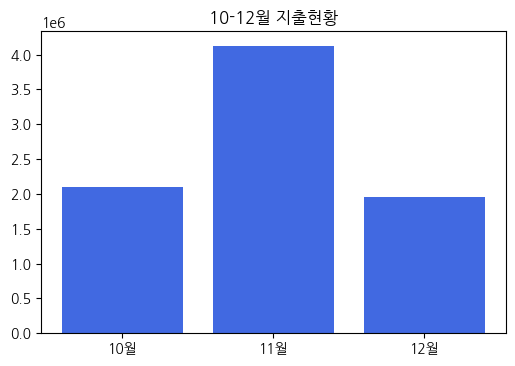

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=100)
plt.rc('font',family ='NanumGothic')
plt.title('10-12월 지출현황')
plt.bar(['10월','11월','12월'], s_mon, color = 'royalblue')
plt.show()

지수표기법 e를 검색해보세요!

### 2) 월별 택시 이용 금액 구하기

프로그램 흐름 생각해보기 


```
1. 10-12월의 월별 택시비 지출액을 저장할 리스트(taxi)를 만들고 각 월별 택시 지출액의 초깃값을 0으로 저장하기
2. 전체 이용내역(data)를 돌며 반복하기
  2.1 매입상태(row[-1])가 '전표매입'이고, 가맹점명에 '택시'가 있다면
    2.1.1 해당 건의 이용월 구하고, 이용금액도 구하기
    2.1.2 이용월에서 10을 빼서 taxi의 인덱스 구하기
    2.1.3 taxi[인덱스] += 이용금액
3. 월별 지출액 리스트로 막대그래프 그리기
```



In [ ]:
taxi = [0, 0, 0]

for row in data : 
    if row[-1] == '전표매입' and '택시' in row[5] : 
        mon = int(row[0].split('-')[1])
        payment = int(row[-3])
        idx = mon-10
        taxi[idx] += payment

print(taxi)

카카오페이(택시) 10 월 [4200, 0, 0]
티머니 개인택시 10 월 [8600, 0, 0]
티머니 개인택시 11 월 [8600, 4700, 0]
티머니 개인택시 11 월 [8600, 12800, 0]
카카오페이(택시) 11 월 [8600, 19600, 0]
카카오페이(택시) 11 월 [8600, 24600, 0]
티머니 개인택시 11 월 [8600, 34700, 0]
카카오페이(택시) 11 월 [8600, 62600, 0]
카카오페이(택시) 11 월 [8600, 73000, 0]
카카오페이(택시) 11 월 [8600, 78600, 0]
카카오페이(택시) 11 월 [8600, 83900, 0]
카카오페이(택시) 12 월 [8600, 83900, 5900]
카카오페이(택시)1 12 월 [8600, 83900, 13600]
카카오페이(택시) 12 월 [8600, 83900, 14600]
카카오페이(택시)1 12 월 [8600, 83900, 23300]
카카오페이(택시) 12 월 [8600, 83900, 24300]
디지비유페이택시개인1 12 월 [8600, 83900, 30600]
티머니 법인택시 12 월 [8600, 83900, 44100]
티머니 법인택시 12 월 [8600, 83900, 47900]
카카오페이(택시) 12 월 [8600, 83900, 52800]
[8600, 83900, 52800]


In [ ]:
# 초간단 ver
taxi = [0,0,0]

for row in data : 
    if row[-1] == '전표매입' and '택시' in row[5] : 
        taxi[int(row[0].split('-')[1])-10] += int(row[-3])

print(taxi)

[8600, 83900, 52800]


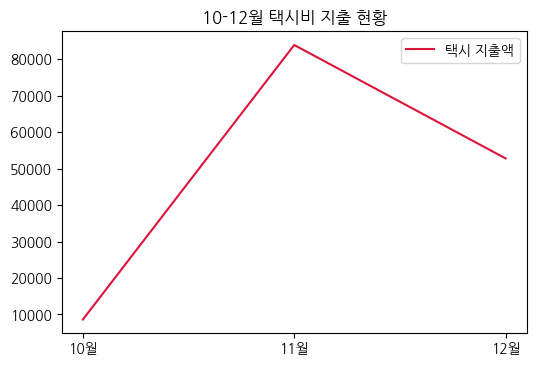

In [ ]:
plt.figure(dpi=100)
plt.title('10-12월 택시비 지출 현황')
plt.plot(['10월','11월','12월'],taxi, color = 'crimson', label ='택시 지출액')
plt.legend()
plt.show()

### 3) 월별 배달 이용 금액 구하기

In [ ]:
deli = [0,0,0]

for row in data : 
    if row[-1] == '전표매입' and row[5] == '(주)우아한형제들': 
        mon = int(row[0].split('-')[1])
        idx = mon-10
        payment = int(row[-3])        
        deli[idx] += payment

print(deli)

[134300, 127900, 99230]


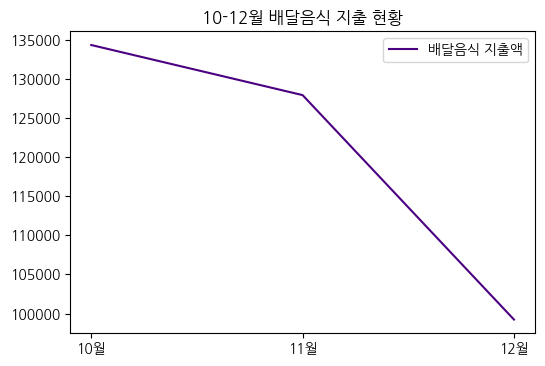

In [ ]:
plt.figure(dpi=100)

plt.title('10-12월 배달음식 지출 현황')
plt.plot(['10월','11월','12월'], deli, color = 'indigo', label ='배달음식 지출액')
plt.legend()
plt.show()

### 4) 택시 지출액과 배달음식 지출액 비교하기

<img src='https://github.com/Ahnjihye/allinone_AI/blob/images/84_%ED%95%98%EC%9C%84%EB%AA%A9%ED%91%9C2.png?raw=true' width=300>

여러 그래프 한 번에 표시하기


```
# 그래프 그리는 명령어를 여러개 작성하고, plt.show()를 마지막에 한번만 작성
plt.plot(리스트A)
plt.plot(리스트B)
plt.show()
```



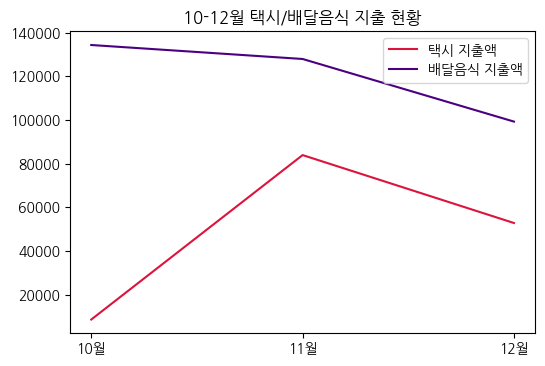

In [ ]:
plt.figure(dpi=100)

plt.title('10-12월 택시/배달음식 지출 현황')

plt.plot(['10월', '11월','12월'], taxi, color = 'crimson', label = '택시 지출액')
plt.plot(['10월','11월','12월'], deli, color = 'indigo', label='배달음식 지출액')

plt.legend()
plt.show()